<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Handson/blob/master/MlStudy05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Study 05 - Support Vector Machine(SVM)

#5.1 소프트마진 분류
- 하드마진? 모든 데이터가 도로 바깥쪽(결정경계선)에 분류 되어있는거(데이터 선형적이어야 제대로 작동. 이상치민감)

- 소프트마진? 마진오류 적당히 허용(넘어가거나 중간에 있는거)해서 오류와 도로폭간 균형을 조절한다.

<도로 즉, 경계범위 넓으면 오류커짐...이상치 대응잘하고 일반화하긴 좋겠지만>


In [ ]:
# ※svm초모수중(하이퍼파라미터) c를통해 과대적합 조절(c줄어들수록 도로넓어짐.) 즉 규제에서 자유로워짐 커지면 규제 강해지고

In [14]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #꽃잎길이, 꽃잎너비열에 대한 정보 저장(Feature Selection)
y = (iris["target"]==2).astype(np.float64) # Virginica인가? True,False를 소수로

svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X,y)

In [5]:
svm_clf.predict([[5.5,1.7]])

array([1.])

#5.2 비선형 SVM

In [12]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
                               ("poly_features",PolynomialFeatures(degree=3)),
                               ("scaler",StandardScaler()),
                               ("svm_clf",LinearSVC(C=10,loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

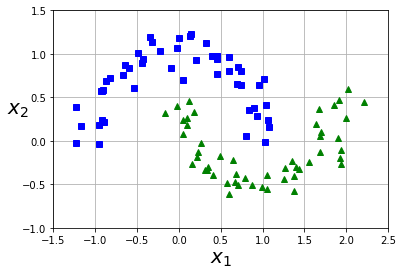

In [15]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

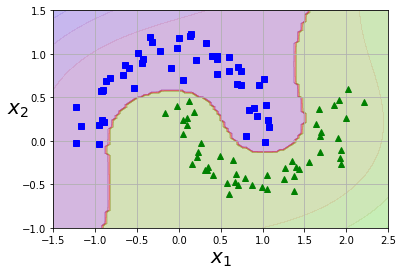

In [16]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.savefig("moons_polynomial_svc_plot")
plt.show()

5.2.1 다항식 커널

In [17]:
#커널트릭 ( 실제로 특성추가 안했는데 다항식특성 추가한 효과를 내는 수학적기교!)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
            ("scaler",StandardScaler()),
            ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5)) #3차다항식, 
]) 
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)